<a href="https://colab.research.google.com/github/tirals88/DL_for_everyone/blob/main/deeplearning/notebook/3%EC%9E%A5%20%EC%84%A0%ED%98%95%20%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

'모두의 딥러닝' 책 스터디 내용을 jupyter notebook으로 정리하여 올립니다.

Github 주소 : 'https://github.com/gilbutITbook/080228'

**모두의 딥러닝**

# 03 장 선형 회귀


## 최소제곱법

최소제곱법을 통해 $y = ax + b$ 함수를 만들고자 할 때, $a$ 를 구하는 방법은 다음과 같다.

$$ a = \frac{Σ{(x - x의 평균)(y - y의 평균)}}{\Sigma{(x - x의 평균)}}$$

행렬식으로는 다음과 같다.

$$ X = (A^{T}A)^{-1}A^{T}Y$$

In [26]:
# 최소제곱법
import numpy as np

data_x = np.array([2, 4, 6, 8])
data_y = np.array([81, 93, 91, 97])

mean_x = np.mean(data_x)
mean_y = np.mean(data_y)

a = ((np.dot((data_x - mean_x), (data_y - mean_y))).sum()/(np.dot((data_x - mean_x), (data_x - mean_x))).sum())
b = mean_y - mean_x * a
print(a, b)

# 최소제곱법 행렬식
A1 = np.reshape(data_x, (4,1))
A2 = np.ones(4)
A2 = np.reshape(A2, (4,1))
A = np.concatenate((A1, A2), axis = 1)

X = np.dot(np.dot(np.linalg.inv(np.dot(A.transpose(), A)), A.transpose()), data_y)

print(A)
print(X)

2.3 79.0
[[2. 1.]
 [4. 1.]
 [6. 1.]
 [8. 1.]]
[ 2.3 79. ]


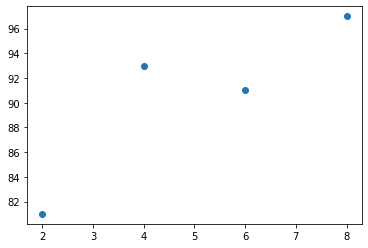

In [29]:
# 좌표 평면으로 확인하기

import matplotlib.pyplot as plt


plt.scatter(data_x, data_y, label = 'original')

plt.show()



```
model = Sequential()
model.add(Dense(30, input_dim = 17, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
```

Sequential 모델은 레이어를 선형으로 연결하여 구성한다.

(출처 : "https://keras.io/ko/getting-started/sequential-model-guide/")

그리고 Dense 의 주요 인자들은 다음과 같다.

- 첫번째 인자(units): 출력 뉴런의 수를 설정합니다.
- input_dim : 입력 뉴련의 수를 설정합니다.
- kernel_initializer : 가중치를 초기화하는 방법을 설정합니다.
-- uniform : 균일 분포
-- normal : 가우시안 분포
- activation : 활성화함수를 설정합니다.
-- linear : 디폴트 값으로 입력값과 가중치로 계산된 결과 값이 그대로 출력으로 나옵니다
-- sigmoid : 시그모이드 함수로 이진분류에서 출력층에 주로 쓰입니다
-- softmax : 소프드맥스 함수로 다중클래스 분류문제에서 출력층에 주로 쓰입니다.
-- relu: Rectified Linear Unit 함수로 은닉층에서 주로 쓰입니다.
(출처 : "https://sevillabk.github.io/Dense/")

이 예제에서는 환자의 기록 데이터인 X 를 17개의 뉴런으로 입력받아서, 30개의 뉴런으로 출력하는 'ReLU' 층과, 

이진분류로 출력하는 'Sigmoid' 층으로 총 두개의 층이 있다.

이 부분에 대해서는 이전에 공부했던 'Deeplearning for Scratch' notebook 에 설명이 있다. ('https://github.com/tirals88/Deep-Learning-from-Scratch/blob/main/1%EA%B6%8C_2%EC%9E%A5_%ED%8D%BC%EC%85%89%ED%8A%B8%EB%A1%A0_%2B_3%EC%9E%A5_%EC%8B%A0%EA%B2%BD%EB%A7%9D(3%EC%B8%B5_%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EA%B9%8C%EC%A7%80).ipynb')



```
model.compile(loss='mean_squared_error', optimizer = 'adam', metrics=['accuracy'])
```

optimizer 의 'Adam'은 'AdaGrad' 와 'Momentum' 의 장점을 더한 매개변수 갱신법이다.

AdaGrad는 매개변수의 원소마다 적응적으로 갱신 정도를 조정하고 모멘텀 모델은 공이 그릇 바닥을 구르는 듯한 움직임을 보인다.

이 부분에 대한 설명 또한 이전 notebook 에 있다. ('https://github.com/tirals88/Deep-Learning-from-Scratch/blob/main/1%EA%B6%8C_6%EC%9E%A5_(1)_%ED%95%99%EC%8A%B5_%EA%B4%80%EB%A0%A8_%EA%B8%B0%EC%88%A0%EB%93%A4.ipynb')


## 결과 분석



```
Epoch 100/100
47/47 [==============================] - 0s 2ms/step - loss: 0.1291 - accuracy: 0.8638
<keras.callbacks.History at 0x7f4ceddebdc0>
```

마지막 출력 행이다.

batch_size = 10 으로 하여 470개의 데이터를 10개씩 묶어 47개의 iteration 으로 100 epochs 을 돌렸다.

여기서 정확도는 86.38%라는 의미이고 정답을 86% 이상 맞췄다는 것이다.

이 훈련과정에서 17개의 input 이 어떤 것인지, 정답이 의미하는 것이 어떤 것인지 명시하지 않았지만 정답을 높은 수준으로 맞추었다는 것이 핵심이다.

다시 데이터를 먼저 보게 되면 18개의 정보 중 17개의 앞선 정보는

[종양의 유형, 폐활량, 호흡 곤란 여부, 고통 정도, ...] 등 17개의 unit 또한 다른 데이터들이고 18번째의 정답 값인 [수술 후 생존여부] 또한 이진수 true or false 이다.

나아가서는 위 17개의 input data 들 중 더 큰 영향을 미친다고 발견 된 feature 에 대해서는 큰 가중치를 줄 수도 있을 것이고, 영향의 정도가 작다고 생각 되는 feature 는 제외시킬 수도 있을 것이다.

또한 이는 출력 값이 sigmoid 함수를 통해 0과 1사이의 값만을 출력하는 방식이 아닌, 병명을 맞추는 다중 출력(분류) 모델로 발전할 수도 있을 것이다.

